<a href="https://colab.research.google.com/github/Vakhranev/Heritage/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json

def load_data(file_path):
    """
    Загрузка данных из JSON-файла.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def get_max_t_score(data):
    """
    Получение максимального T-Score из данных.
    """
    max_t_score = 0
    for content in data.values():
        bigrams = content.get("bigrams_unique", {})
        max_t_score = max(max_t_score, max((value["t_score"] for value in bigrams.values()), default=0))
    return max_t_score

# Загрузка данных
student_data = load_data('updated_america_texts_last.json')
literature_data = load_data('final_school.json')

# Получение максимальных значений T-Score
max_student_t_score = get_max_t_score(student_data)
max_literature_t_score = get_max_t_score(literature_data)

# Вывод результатов
print(f"Максимальный T-Score для студенческих текстов: {max_student_t_score}")
print(f"Максимальный T-Score для художественной литературы: {max_literature_t_score}")

Максимальный T-Score для студенческих текстов: 1.0
Максимальный T-Score для художественной литературы: 0.8818741446215699


In [ ]:
import json
import numpy as np

def load_data(file_path):
    """
    Загрузка данных из JSON-файла.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def get_t_score_distribution(data, bin_size=0.025):
    """
    Расчёт распределения T-Score по группам.
    """
    t_scores = []
    for content in data.values():
        bigrams = content.get("bigrams_unique", {})
        t_scores.extend(value["t_score"] for value in bigrams.values() if value["t_score"] > 0)

    # Группы
    bins = np.arange(0, 1.0 + bin_size, bin_size)
    distribution, _ = np.histogram(t_scores, bins=bins)

    # Вычисление в процентах
    total = sum(distribution)
    if total > 0:
        percentage_distribution = (distribution / total) * 100
    else:
        percentage_distribution = [0] * len(distribution)

    return bins, percentage_distribution

# Загрузка данных
student_data = load_data('updated_america_texts_last.json')
literature_data = load_data('final_school.json')

# Расчёт распределения
bins, student_distribution = get_t_score_distribution(student_data)
_, literature_distribution = get_t_score_distribution(literature_data)

# Вывод результатов
print("Распределение T-Score для студенческих текстов:")
for i in range(len(bins) - 1):
    print(f"[{bins[i]:.3f}, {bins[i+1]:.3f}): {student_distribution[i]:.2f}%")
print("\nРаспределение T-Score для художественной литературы:")
for i in range(len(bins) - 1):
    print(f"[{bins[i]:.3f}, {bins[i+1]:.3f}): {literature_distribution[i]:.2f}%")

Распределение T-Score для студенческих текстов:
[0.000, 0.025): 38.33%
[0.025, 0.050): 18.70%
[0.050, 0.075): 9.60%
[0.075, 0.100): 6.79%
[0.100, 0.125): 4.46%
[0.125, 0.150): 3.67%
[0.150, 0.175): 2.34%
[0.175, 0.200): 3.16%
[0.200, 0.225): 2.34%
[0.225, 0.250): 1.23%
[0.250, 0.275): 1.74%
[0.275, 0.300): 0.94%
[0.300, 0.325): 0.82%
[0.325, 0.350): 0.66%
[0.350, 0.375): 0.42%
[0.375, 0.400): 0.47%
[0.400, 0.425): 0.90%
[0.425, 0.450): 0.19%
[0.450, 0.475): 0.35%
[0.475, 0.500): 0.28%
[0.500, 0.525): 0.22%
[0.525, 0.550): 0.56%
[0.550, 0.575): 0.23%
[0.575, 0.600): 0.17%
[0.600, 0.625): 0.67%
[0.625, 0.650): 0.05%
[0.650, 0.675): 0.09%
[0.675, 0.700): 0.09%
[0.700, 0.725): 0.08%
[0.725, 0.750): 0.08%
[0.750, 0.775): 0.06%
[0.775, 0.800): 0.00%
[0.800, 0.825): 0.00%
[0.825, 0.850): 0.00%
[0.850, 0.875): 0.05%
[0.875, 0.900): 0.16%
[0.900, 0.925): 0.00%
[0.925, 0.950): 0.00%
[0.950, 0.975): 0.00%
[0.975, 1.000): 0.09%

Распределение T-Score для художественной литературы:
[0.000, 0.025): 

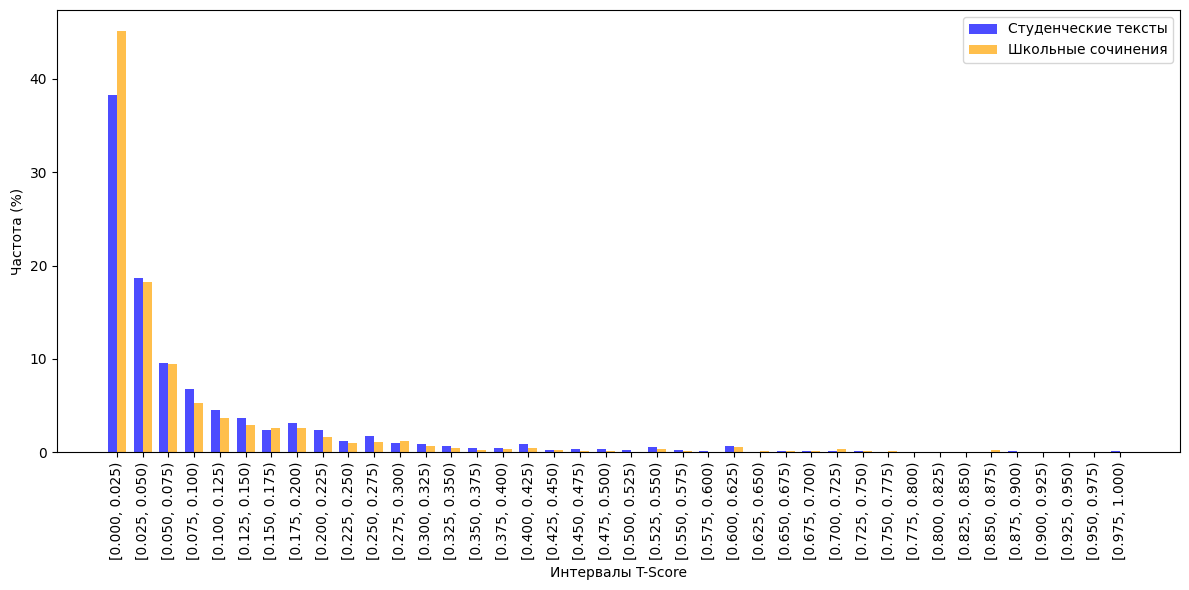

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Данные для студенческих текстов
student_intervals = [
    "[0.000, 0.025)", "[0.025, 0.050)", "[0.050, 0.075)", "[0.075, 0.100)", "[0.100, 0.125)", "[0.125, 0.150)",
    "[0.150, 0.175)", "[0.175, 0.200)", "[0.200, 0.225)", "[0.225, 0.250)", "[0.250, 0.275)", "[0.275, 0.300)",
    "[0.300, 0.325)", "[0.325, 0.350)", "[0.350, 0.375)", "[0.375, 0.400)", "[0.400, 0.425)", "[0.425, 0.450)",
    "[0.450, 0.475)", "[0.475, 0.500)", "[0.500, 0.525)", "[0.525, 0.550)", "[0.550, 0.575)", "[0.575, 0.600)",
    "[0.600, 0.625)", "[0.625, 0.650)", "[0.650, 0.675)", "[0.675, 0.700)", "[0.700, 0.725)", "[0.725, 0.750)",
    "[0.750, 0.775)", "[0.775, 0.800)", "[0.800, 0.825)", "[0.825, 0.850)", "[0.850, 0.875)", "[0.875, 0.900)",
    "[0.900, 0.925)", "[0.925, 0.950)", "[0.950, 0.975)", "[0.975, 1.000)"
]
student_percentages = [
    38.33, 18.70, 9.60, 6.79, 4.46, 3.67, 2.34, 3.16, 2.34, 1.23, 1.74, 0.94, 0.82, 0.66, 0.42, 0.47, 0.90, 0.19,
    0.35, 0.28, 0.22, 0.56, 0.23, 0.17, 0.67, 0.05, 0.09, 0.09, 0.08, 0.08, 0.06, 0.00, 0.00, 0.00, 0.05, 0.16,
    0.00, 0.00, 0.00, 0.09
]

# Данные для школьных сочинений
literature_intervals = [
    "[0.000, 0.025)", "[0.025, 0.050)", "[0.050, 0.075)", "[0.075, 0.100)", "[0.100, 0.125)", "[0.125, 0.150)",
    "[0.150, 0.175)", "[0.175, 0.200)", "[0.200, 0.225)", "[0.225, 0.250)", "[0.250, 0.275)", "[0.275, 0.300)",
    "[0.300, 0.325)", "[0.325, 0.350)", "[0.350, 0.375)", "[0.375, 0.400)", "[0.400, 0.425)", "[0.425, 0.450)",
    "[0.450, 0.475)", "[0.475, 0.500)", "[0.500, 0.525)", "[0.525, 0.550)", "[0.550, 0.575)", "[0.575, 0.600)",
    "[0.600, 0.625)", "[0.625, 0.650)", "[0.650, 0.675)", "[0.675, 0.700)", "[0.700, 0.725)", "[0.725, 0.750)",
    "[0.750, 0.775)", "[0.775, 0.800)", "[0.800, 0.825)", "[0.825, 0.850)", "[0.850, 0.875)", "[0.875, 0.900)",
    "[0.900, 0.925)", "[0.925, 0.950)", "[0.950, 0.975)", "[0.975, 1.000)"
]
literature_percentages = [
    45.14, 18.22, 9.49, 5.31, 3.64, 2.91, 2.57, 2.60, 1.64, 0.99, 1.10, 1.21, 0.62, 0.48, 0.23, 0.37, 0.45, 0.25,
    0.17, 0.14, 0.06, 0.37, 0.17, 0.06, 0.54, 0.17, 0.14, 0.08, 0.34, 0.14, 0.14, 0.00, 0.00, 0.00, 0.20, 0.06,
    0.00, 0.00, 0.00, 0.00
]

# Параметры графика
x = np.arange(len(student_intervals))
width = 0.35

# Создание графика
plt.figure(figsize=(12, 6))
plt.bar(x - width / 2, student_percentages, width, label='Студенческие тексты', color='blue', alpha=0.7)
plt.bar(x + width / 2, literature_percentages, width, label='Школьные сочинения', color='orange', alpha=0.7)

# Настройки графика
plt.xlabel('Интервалы T-Score')
plt.ylabel('Частота (%)')
plt.xticks(x, student_intervals, rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('Рис. 8. График распределения оценок метрики t-score.jpg', dpi=300)

# Отображение графика
plt.show()

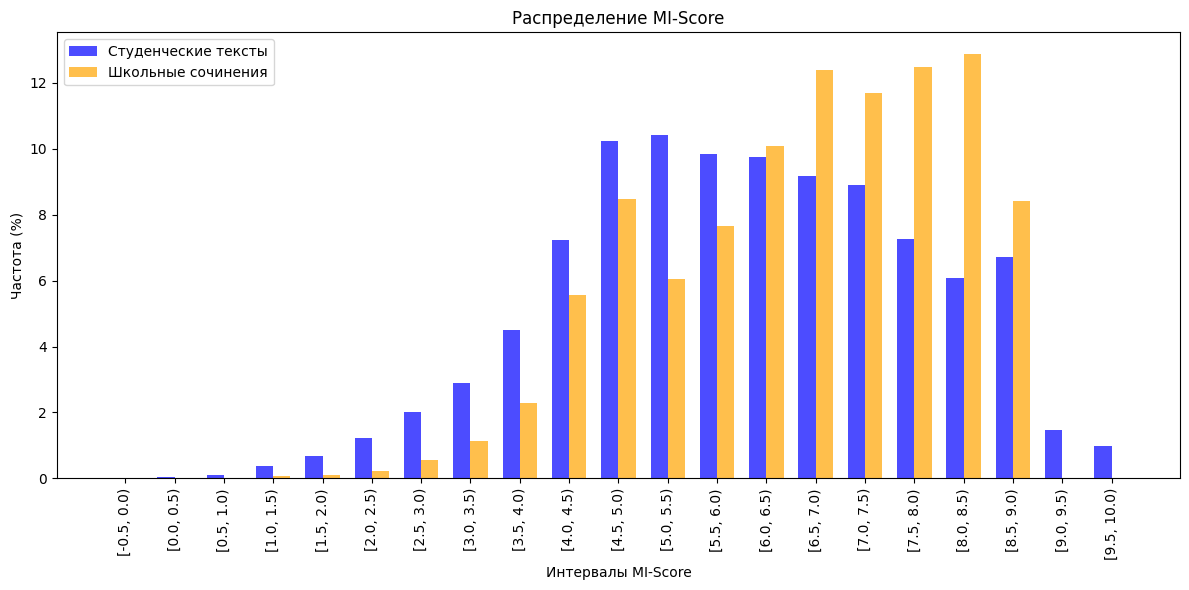

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def calculate_mi_score(bigram_freq, token_freq, total_tokens):
    """
    Вычисление MI-Score для биграмм.
    bigram_freq: частота биграммы
    token_freq: частоты отдельных токенов
    total_tokens: общее количество токенов в корпусе
    """
    p_bigram = bigram_freq / total_tokens
    p_token1 = token_freq[0] / total_tokens
    p_token2 = token_freq[1] / total_tokens
    if p_token1 * p_token2 > 0:
        return np.log2(p_bigram / (p_token1 * p_token2))
    else:
        return 0

def load_data(file_path):
    """
    Загрузка данных из JSON-файла.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def prepare_mi_data(data, text_type):
    """
    Подготовка данных для анализа MI-Score с добавлением метки типа текста.
    """
    mi_data = []
    for text_id, content in data.items():
        total_tokens = len(content["tokens"])
        bigrams_freq = content["bigrams_freq"]
        for bigram, freq in bigrams_freq.items():
            token1, token2 = bigram.split()
            token_freq = (content["tokens"].count(token1), content["tokens"].count(token2))
            mi_score = calculate_mi_score(freq, token_freq, total_tokens)
            mi_data.append(mi_score)
    return mi_data

def calculate_intervals(data, interval_size=0.5, max_value=10.0):
    """
    Группировка данных по интервалам и вычисление распределения.
    data: список значений
    interval_size: шаг интервала
    max_value: максимальное значение
    """
    intervals = {}
    for value in data:
        if value < max_value:
            start = interval_size * int(value // interval_size)
            end = start + interval_size
            key = f"[{start:.1f}, {end:.1f})"
            if key not in intervals:
                intervals[key] = 0
            intervals[key] += 1
    total = len(data)
    intervals = {k: (v / total) * 100 for k, v in intervals.items()}  # Перевод в проценты
    return intervals

def align_intervals(intervals1, intervals2):
    """
    Выравнивание интервалов между двумя наборами данных.
    """
    all_keys = sorted(set(intervals1.keys()).union(intervals2.keys()))
    aligned1 = [intervals1.get(key, 0) for key in all_keys]
    aligned2 = [intervals2.get(key, 0) for key in all_keys]
    return all_keys, aligned1, aligned2

def plot_mi_distribution(student_intervals, literature_intervals, title, filename):
    """
    Визуализация распределения MI-Score.
    """
    # Выравниваем интервалы
    intervals, student_values, literature_values = align_intervals(student_intervals, literature_intervals)

    x = np.arange(len(intervals))
    width = 0.35

    plt.figure(figsize=(12, 6))
    plt.bar(x - width / 2, student_values, width, label='Студенческие тексты', color='blue', alpha=0.7)
    plt.bar(x + width / 2, literature_values, width, label='Школьные сочинения', color='orange', alpha=0.7)

    plt.xlabel('Интервалы MI-Score')
    plt.ylabel('Частота (%)')
    plt.title(title)
    plt.xticks(x, intervals, rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Загрузка данных
student_data = load_data('updated_america_texts_last.json')
literature_data = load_data('final_school.json')

# Подготовка данных
student_mi_scores = prepare_mi_data(student_data, 'Студенческие тексты')
literature_mi_scores = prepare_mi_data(literature_data, 'Школьные сочинения')

# Вычисление распределения
student_intervals = calculate_intervals(student_mi_scores)
literature_intervals = calculate_intervals(literature_mi_scores)

# Визуализация распределения MI-Score
plot_mi_distribution(student_intervals, literature_intervals, 'Распределение MI-Score', 'mi_score_distribution.png')

In [ ]:
def calculate_max_mi_scores(data):
    """
    Вычисление максимальных значений MI-Score для каждого файла.

    Parameters:
    data (dict): Данные, содержащие биграммы и их частоты.

    Returns:
    dict: Максимальные значения MI-Score для каждого файла.
    """
    max_mi_scores = {}
    for file_name, content in data.items():
        total_tokens = len(content["tokens"])
        bigrams_freq = content["bigrams_freq"]
        max_mi = None

        for bigram, freq in bigrams_freq.items():
            token1, token2 = bigram.split()
            token_freq = (content["tokens"].count(token1), content["tokens"].count(token2))
            mi_score = calculate_mi_score(freq, token_freq, total_tokens)
            if max_mi is None or mi_score > max_mi:
                max_mi = mi_score

        max_mi_scores[file_name] = max_mi if max_mi is not None else 0

    return max_mi_scores

# Вычисляем максимальные MI-Score для каждого файла
student_max_mi_scores = calculate_max_mi_scores(student_data)
literature_max_mi_scores = calculate_max_mi_scores(literature_data)

# Вывод максимальных значений MI-Score
print("Максимальные значения MI-Score для студенческих текстов:")
for file, score in student_max_mi_scores.items():
    print(f"{file}: {score:.3f}")

print("\nМаксимальные значения MI-Score для художественной литературы:")
for file, score in literature_max_mi_scores.items():
    print(f"{file}: {score:.3f}")

Максимальные значения MI-Score для студенческих текстов:
EC12-B1-0404_tagged_CORRECTED: 8.562
EC12-B1-0933_tagged_CORRECTED: 7.907
EC12-B1-6104_tagged_CORRECTED: 7.687
EC12-B1_0358_tagged: 6.687
EC12-B1_0985_tagged: 6.954
EC12-B1_7121_tagged: 5.954
EC12-B1_7499_tagged_CORRECTED: 6.741
EC12-B1_8921_tagged: 5.977
EC12_B1_1827_tagged_CORRECTED: 7.000
EC12_B1_1953_tagged_CORRECTED: 6.943
EC12_B1_2114_tagged_ CORRECTED: 6.570
EC12_B1_2136_tagged_CORRECTED: 8.195
EC12_B1_2421_tagged_ CORRECTED: 8.459
EC12_B1_2972_tagged: 7.948
EC12_B1_3091_tagged_CORRECTED: 6.658
EC12_B1_4774_tagged_CORRECTED: 6.629
EC12_B1_4930_tagged_CORRECTED: 7.741
EC12_B1_5306_tagged_CORRECTED: 6.883
EC12_B1_6010_tagged_CORRECTED: 7.119
EC12_B1_6143_tagged_ CORRECTED: 8.299
EC12_B1_6378_tagged_ CORRECTED: 6.883
EC12_B1_6409_tagged_CORRECTED: 7.637
EC12_B1_6457_tagged_CORRECTED: 8.200
EC12_B2_2797_tagged_ST: 5.781
EC12-B1-0454_tagged CORRECTED: 6.931
EC12-B1-1086_tagged CORRECTED: 9.369
EC12-B1-5202_tagged CORRECTED: 7.5